An overview of the different drawtypes used

Initial parameters

In [3]:
# !pip install matplotlib2tikz
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
from matplotlib import style
import matplotlib2tikz
import numpy as np

n_r = 20 #draws per household
n_q = 20 #number of households
n_k = 2 #number of variables/dimensions

def visualize(draws, title=None, save=False):
    fig = plt.figure()
    style.use('ggplot')
    if n_k == 2:
        x = draws[:, :, 0].flatten()
        y = draws[:, :, 1].flatten()
        plt.style.use('seaborn-whitegrid')
        plt.plot(x, y, 'o', color='black', markersize=4);
        plt.xlabel('dimension 1')
        plt.ylabel('dimension 2')
        plt.title(title)
        plt.grid(True)
         
        if save != False:  matplotlib2tikz.save("Tikz/"+save)
       
        
    elif n_k == 3:
        ax = Axes3D(fig)
        x = draws[:, :, 0].flatten()
        y = draws[:, :, 1].flatten()
        z = draws[:, :, 2].flatten()
        ax.scatter3D(x, y, z, c=z, cmap='Reds');

Pseudo random

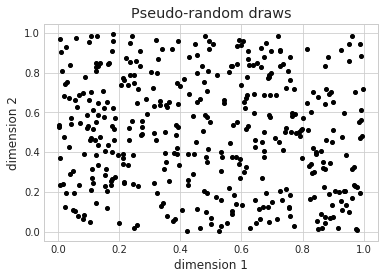

In [4]:
draws = np.random.rand(n_r, n_q, n_k)
# display(draws)

visualize(draws, title="Pseudo-random draws")

Halton sequences

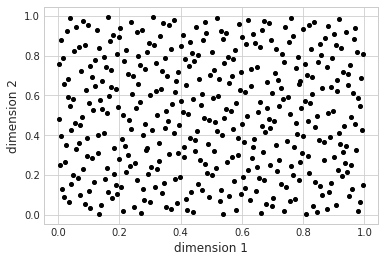

In [5]:
# !pip install ghalton
from scipy.stats import norm
import ghalton
 #initialize sequencer with K dimensions
sequencer = ghalton.Halton(n_k)
            
#make the draws and discard the 10 inital values to prevent issues
halton = np.array(sequencer.get(n_q * n_r + 10)[10:])

#make the result array
draws = np.zeros((n_r, n_q, n_k))

#assign the right probablilities
for q in range(n_q):
     for r in range(n_r):
        draws[r, q, :] = halton[n_r * q + r,:]

#convert to standard variates
# draws = norm.ppf(draws)
# display(draws)
visualize(draws)

Lattice points

(t,m,s)-nets

In [ ]:
https://people.cs.kuleuven.be/~dirk.nuyens/taiwan/QMC-practical-guide-20161107-1up.pdf

R2

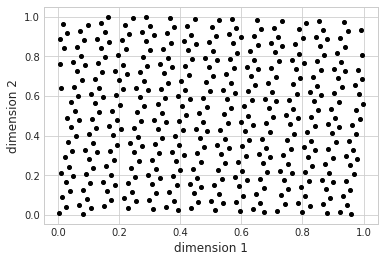

In [7]:
#generalized definition of the golden ration
def r2draws(n, d, seed=0.5): 
    def phi(d): 
        x=2
        for i in range(100): 
            x = pow(1+x,1/(d+1)) 
        return x
    
    g = phi(d) 
    alpha = np.zeros(d) 
    for j in range(d): 
        alpha[j] = pow(1/g,j+1)  %1 # mod 1 

    r2draws = np.zeros((n, d))
    for i in range(n): 
          r2draws[i] = (seed + alpha*(i+1)) % 1 # mod 1 
            
    return r2draws

#make the draws and discard the 10 inital values to prevent issues
goldenr2 = np.array(r2draws(n_q * n_r, n_k))

#make the result array
draws = np.zeros((n_r, n_q, n_k))

#assign the right probablilities
for q in range(n_q):
     for r in range(n_r):
        draws[r, q, :] = goldenr2[n_r * q + r,:] 


visualize(draws)

Sobol

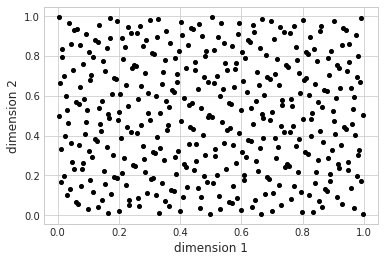

In [35]:
# !pip install sobol_seq
import sobol_seq

sobol = sobol_seq.i4_sobol_generate(n_k, n_r*n_q+10)[10:]
#make the result array
draws = np.zeros((n_r, n_q, n_k))

#assign the right probablilities
for q in range(n_q):
     for r in range(n_r):
        draws[r, q, :] = sobol[n_r * q + r,:] 

visualize(draws)      

In [ ]:
latin hypercubes
https://stackoverflow.com/questions/26137195/latin-hypercube-sampling-with-python
https://pythonhosted.org/pyDOE/randomized.html